# Importing libraries

In [1]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.1 MB/s eta 0:00:00


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
from PIL import Image, ImageEnhance
import imagehash
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading the dataset and viewing it

In [3]:
daisy_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/daisy')
dandelion_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/dandelion')
rose_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/rose')
sunflower_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/sunflower')
tulip_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/tulip')

#check for imbalancing

print(len(daisy_files))
print(len(dandelion_files))
print(len(rose_files))
print(len(sunflower_files))
print(len(tulip_files))

501
646
497
495
607


In [4]:
daisy_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/flower training/daisy', img)) for img in daisy_files]
dandelion_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/flower training/dandelion', img)) for img in dandelion_files]
rose_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/flower training/rose', img)) for img in rose_files]
sunflower_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/flower training/sunflower', img)) for img in sunflower_files]
tulip_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/flower training/tulip', img)) for img in tulip_files]



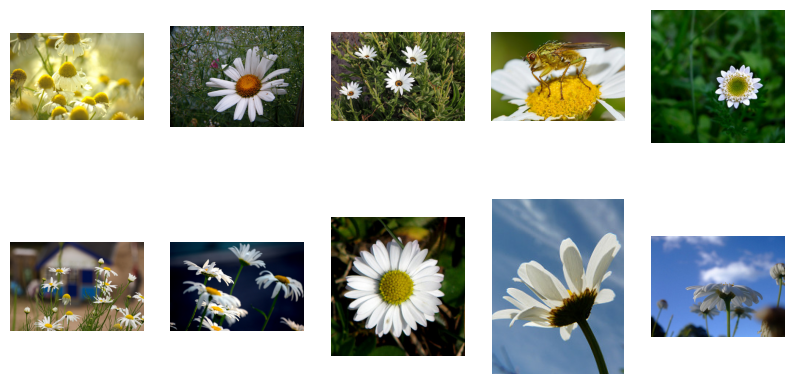

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(daisy_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

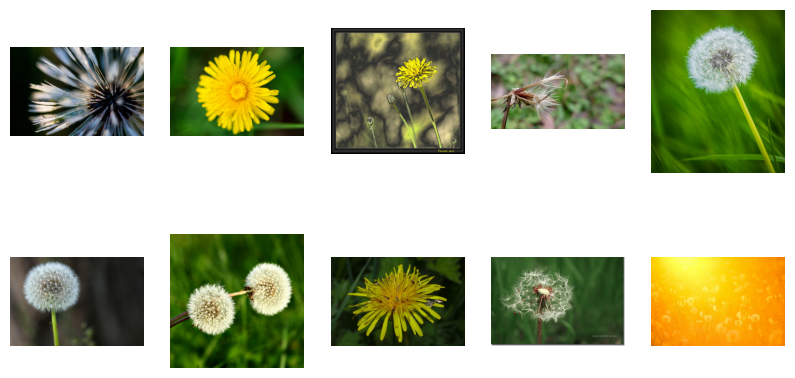

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(dandelion_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

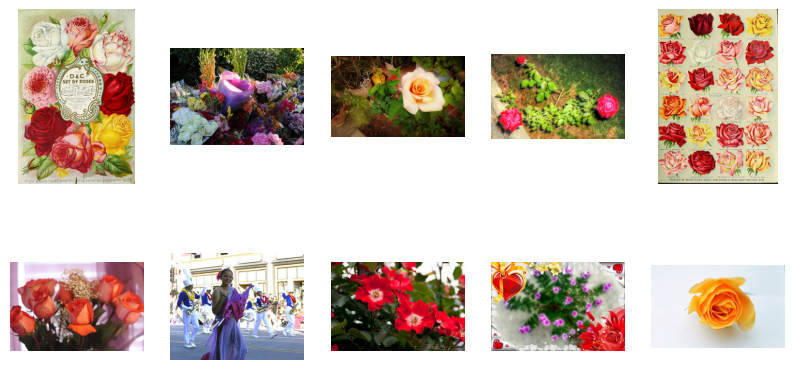

In [7]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(rose_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

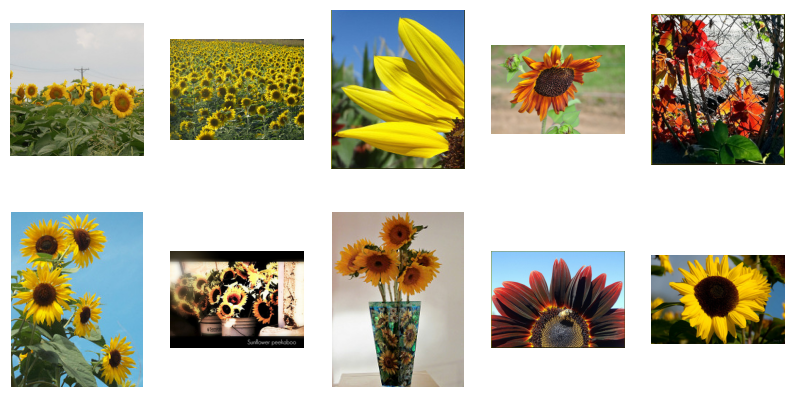

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(sunflower_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

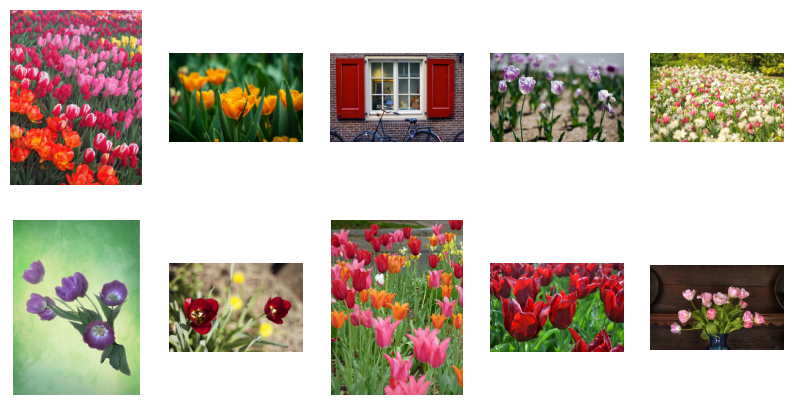

In [9]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(tulip_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# Dealing with photo duplicates

In [5]:
#hashing images and find duplicates

daisy_image_hashes = {}
daisy_duplicates = []

dandelion_image_hashes = {}
dandelion_duplicates = []

rose_image_hashes = {}
rose_duplicates = []

sunflower_image_hashes = {}
sunflower_duplicates = []

tulip_image_hashes = {}
tulip_duplicates = []

for img_array  in daisy_images:

    img = Image.fromarray(img_array)
    hash_value = imagehash.phash(img)
    if hash_value in daisy_image_hashes:
       daisy_duplicates.append((img_array, daisy_image_hashes[hash_value]))
    else:
       daisy_image_hashes[hash_value] = img_array

for img_array  in dandelion_images:

    img = Image.fromarray(img_array)
    hash_value = imagehash.phash(img)
    if hash_value in dandelion_image_hashes:
       dandelion_duplicates.append((img_array, dandelion_image_hashes[hash_value]))
    else:
       dandelion_image_hashes[hash_value] = img_array

for img_array  in rose_images:

    img = Image.fromarray(img_array)
    hash_value = imagehash.phash(img)
    if hash_value in rose_image_hashes:
       rose_duplicates.append((img_array, rose_image_hashes[hash_value]))
    else:
       rose_image_hashes[hash_value] = img

for img_array  in sunflower_images:

    img = Image.fromarray(img_array)
    hash_value = imagehash.phash(img)
    if hash_value in sunflower_image_hashes:
       sunflower_duplicates.append((img_array, sunflower_image_hashes[hash_value]))
    else:
       sunflower_image_hashes[hash_value] = img

for img_array  in tulip_images:

    img = Image.fromarray(img_array)
    hash_value = imagehash.phash(img)
    if hash_value in tulip_image_hashes:
       tulip_duplicates.append((img_array, tulip_image_hashes[hash_value]))
    else:
       tulip_image_hashes[hash_value] = img

print(len(daisy_duplicates))
print(len(dandelion_duplicates))
print(len(rose_duplicates))
print(len(sunflower_duplicates))
print(len(tulip_duplicates))

2
0
0
2
0


In [6]:
#delete duplicates

for duplicate in daisy_duplicates:
  for i in range(len(daisy_images)):
    if daisy_images[i].shape == duplicate[0].shape and np.array_equal(daisy_images[i], duplicate[0]):
      del daisy_images[i]
      break

for duplicate in sunflower_duplicates:
  for i in range(len(sunflower_images)):
    if sunflower_images[i].shape == duplicate[0].shape and np.array_equal(sunflower_images[i], duplicate[0]):
      del sunflower_images[i]
      break

print(len(daisy_images))
print(len(sunflower_images))

499
493


# Resizing the images to a standard

In [7]:
#resizing images to a standard

for i in range(len(daisy_images)):
  daisy_images[i] = cv2.resize(daisy_images[i], (224, 224), interpolation = cv2.INTER_CUBIC)

for i in range(len(dandelion_images)):
  dandelion_images[i] = cv2.resize(dandelion_images[i], (224, 224), interpolation = cv2.INTER_CUBIC)

for i in range(len(rose_images)):
  rose_images[i] = cv2.resize(rose_images[i], (224, 224), interpolation = cv2.INTER_CUBIC)

for i in range(len(sunflower_images)):
  sunflower_images[i] = cv2.resize(sunflower_images[i], (224, 224), interpolation = cv2.INTER_CUBIC)

for i in range(len(tulip_images)):
  tulip_images[i] = cv2.resize(tulip_images[i], (224, 224), interpolation = cv2.INTER_CUBIC)

print(daisy_images[7].shape)
print(tulip_images[0].shape)

(224, 224, 3)
(224, 224, 3)


# Applying image augmentation for diversity

In [8]:
#applying image augmentation for diversity

for daisy_image, file in zip(daisy_images, daisy_files):
    i=random.choice([0,1,2,3,4])
    if i==0:
       aug_img = cv2.flip(daisy_image, i)
    elif i==1:
       aug_img = cv2.flip(daisy_image, i)
    elif i==2:
      height, width = daisy_image.shape[:2]
      rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
      aug_img = cv2.warpAffine(daisy_image, rotation_matrix, (width, height))
    elif i==3:
      aug_img = cv2.transpose(daisy_image)
    else:
      temp = cv2.resize(daisy_image, (448, 448), interpolation = cv2.INTER_CUBIC)
      aug_img = daisy_image[112:336, 112:336]

    cv2.imwrite('/content/drive/MyDrive/Data sets/flower training/daisy/aug ' + file, aug_img)

for dandelion_image, file in zip(dandelion_images, dandelion_files):
    i=random.choice([0,1,2,3,4])
    if i==0:
      aug_img = cv2.flip(dandelion_image, i)
    elif i==1:
      aug_img = cv2.flip(dandelion_image, i)
    elif i==2:
      height, width = dandelion_image.shape[:2]
      rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
      aug_img = cv2.warpAffine(dandelion_image, rotation_matrix, (width, height))
    elif i==3:
      aug_img = cv2.transpose(dandelion_image)
    else:
      temp = cv2.resize(dandelion_image, (448, 448), interpolation = cv2.INTER_CUBIC)
      aug_img = dandelion_image[112:336, 112:336]

    cv2.imwrite('/content/drive/MyDrive/Data sets/flower training/dandelion/aug ' + file, aug_img)

for rose_image, file in zip(rose_images, rose_files):
    i=random.choice([0,1,2,3,4])
    if i==0:
      aug_img = cv2.flip(rose_image, i)
    elif i==1:
      aug_img = cv2.flip(rose_image, i)
    elif i==2:
      height, width = rose_image.shape[:2]
      rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
      aug_img = cv2.warpAffine(rose_image, rotation_matrix, (width, height))
    elif i==3:
      aug_img = cv2.transpose(rose_image)
    else:
      temp = cv2.resize(rose_image, (448, 448), interpolation = cv2.INTER_CUBIC)
      aug_img = rose_image[112:336, 112:336]

    cv2.imwrite('/content/drive/MyDrive/Data sets/flower training/rose/aug ' + file, aug_img)

for sunflower_image, file in zip(sunflower_images, sunflower_files):
    i=random.choice([0,1,2,3,4])
    if i==0:
      aug_img = cv2.flip(sunflower_image, i)
    elif i==1:
      aug_img = cv2.flip(sunflower_image, i)
    elif i==2:
      height, width = sunflower_image.shape[:2]
      rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
      aug_img = cv2.warpAffine(sunflower_image, rotation_matrix, (width, height))
    elif i==3:
      aug_img = cv2.transpose(sunflower_image)
    else:
      temp = cv2.resize(sunflower_image, (448, 448), interpolation = cv2.INTER_CUBIC)
      aug_img = sunflower_image[112:336, 112:336]

    cv2.imwrite('/content/drive/MyDrive/Data sets/flower training/sunflower/aug ' + file, aug_img)

for tulip_image, file in zip(tulip_images, tulip_files):
    i=random.choice([0,1,2,3,4])
    if i==0:
      aug_img = cv2.flip(tulip_image, i)
    elif i==1:
      aug_img = cv2.flip(tulip_image, i)
    elif i==2:
      height, width = tulip_image.shape[:2]
      rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
      aug_img = cv2.warpAffine(tulip_image, rotation_matrix, (width, height))
    elif i==3:
      aug_img = cv2.transpose(tulip_image)
    else:
      temp = cv2.resize(tulip_image, (448, 448), interpolation = cv2.INTER_CUBIC)
      aug_img = tulip_image[112:336, 112:336]

    cv2.imwrite('/content/drive/MyDrive/Data sets/flower training/tulip/aug ' + file, aug_img)


# Labelling Images

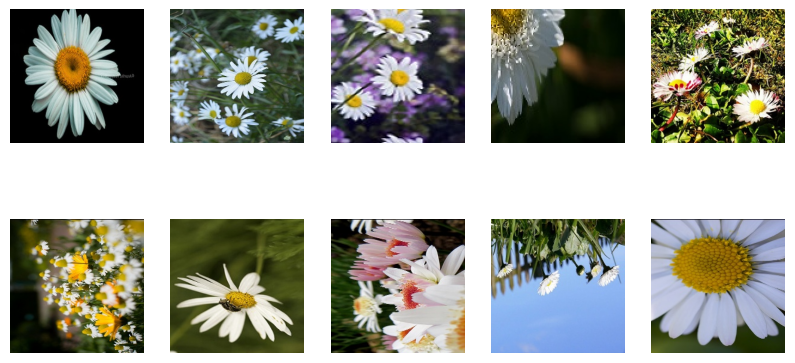

In [2]:
dataset = []
label = []


daisy_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/daisy')
daisy_images_total = []
for file in daisy_files:
  daisy_images_total.append(cv2.imread('/content/drive/MyDrive/Data sets/flower training/daisy/' + file))
  image = cv2.imread('/content/drive/MyDrive/Data sets/flower training/daisy/' + file)
  image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(0)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(daisy_images_total[i + 600], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

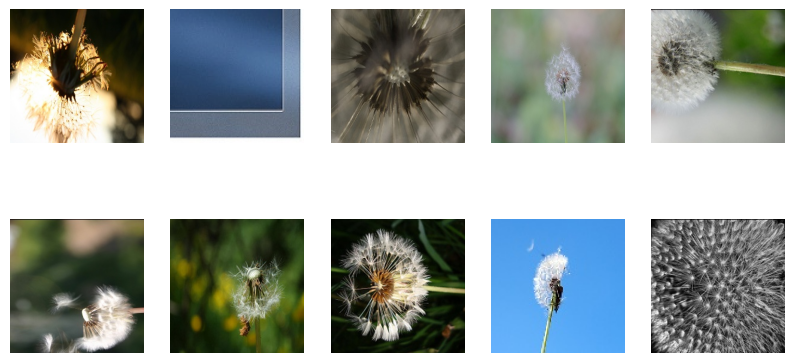

In [3]:
dandelion_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/dandelion')
dandelion_images_total = []
for file in dandelion_files:
  dandelion_images_total.append(cv2.imread('/content/drive/MyDrive/Data sets/flower training/dandelion/' + file))
  image = cv2.imread('/content/drive/MyDrive/Data sets/flower training/dandelion/' + file)
  image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(dandelion_images_total[i + 610], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

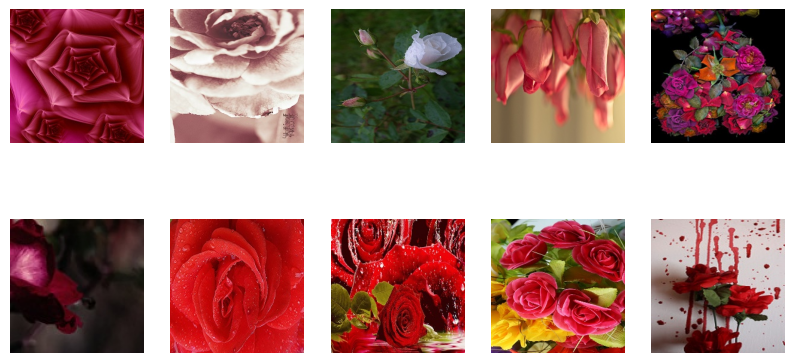

In [4]:
rose_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/rose')
rose_images_total = []
for file in rose_files:
  rose_images_total.append(cv2.imread('/content/drive/MyDrive/Data sets/flower training/rose/' + file))
  image = cv2.imread('/content/drive/MyDrive/Data sets/flower training/rose/' + file)
  image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(2)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(rose_images_total[i + 610], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

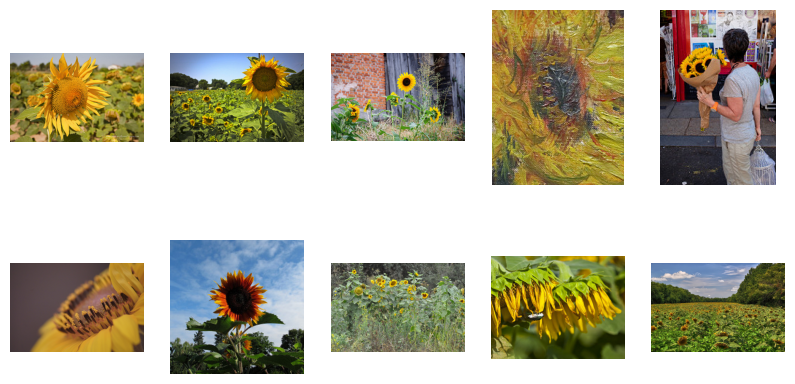

In [5]:
sunflower_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/sunflower')
sunflower_images_total = []
for file in sunflower_files:
  sunflower_images_total.append(cv2.imread('/content/drive/MyDrive/Data sets/flower training/sunflower/' + file))
  image = cv2.imread('/content/drive/MyDrive/Data sets/flower training/sunflower/' + file)
  image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(3)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(sunflower_images_total[i + 400], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

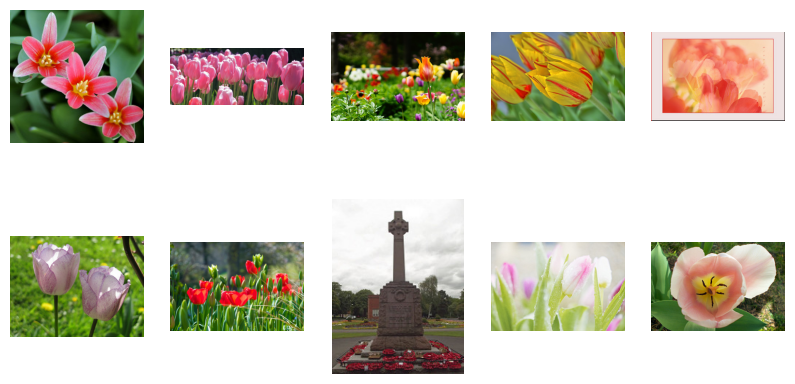

In [6]:
tulip_files = os.listdir('/content/drive/MyDrive/Data sets/flower training/tulip')
tulip_images_total = []
for file in tulip_files:
  tulip_images_total.append(cv2.imread('/content/drive/MyDrive/Data sets/flower training/tulip/' + file))
  image = cv2.imread('/content/drive/MyDrive/Data sets/flower training/tulip/' + file)
  image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(4)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(tulip_images_total[i + 400], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# splitting the data to test & train

In [7]:
# Reshape the data to 2D (flatten the images) before splitting
dataset_reshaped = np.array(dataset).reshape(len(dataset), -1)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(dataset_reshaped, label, test_size=0.2, random_state=42)

# Applying logistic regression model to it

In [8]:
# Initialize Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


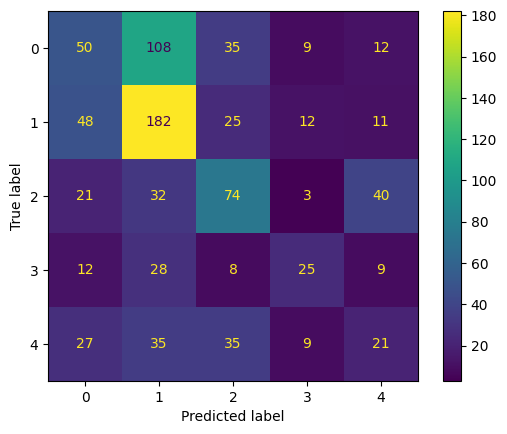

In [9]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.23      0.27       214
           1       0.47      0.65      0.55       278
           2       0.42      0.44      0.43       170
           3       0.43      0.30      0.36        82
           4       0.23      0.17      0.19       127

    accuracy                           0.40       871
   macro avg       0.37      0.36      0.36       871
weighted avg       0.38      0.40      0.39       871



# Applying naive bayes classification model to it

In [11]:
# Initialize Naive Bayes model
nb = GaussianNB()
# Fit the model to the training data
nb.fit(X_train, y_train)
# Make predictions on the test data
y_pred = nb.predict(X_test)

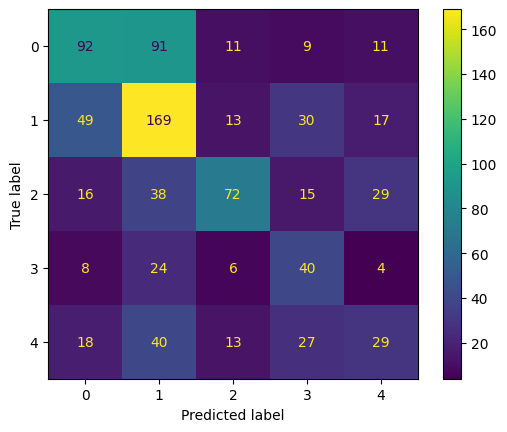

In [12]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       214
           1       0.47      0.61      0.53       278
           2       0.63      0.42      0.51       170
           3       0.33      0.49      0.39        82
           4       0.32      0.23      0.27       127

    accuracy                           0.46       871
   macro avg       0.45      0.44      0.43       871
weighted avg       0.47      0.46      0.46       871



# Applying decision tree classification model to it

In [14]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

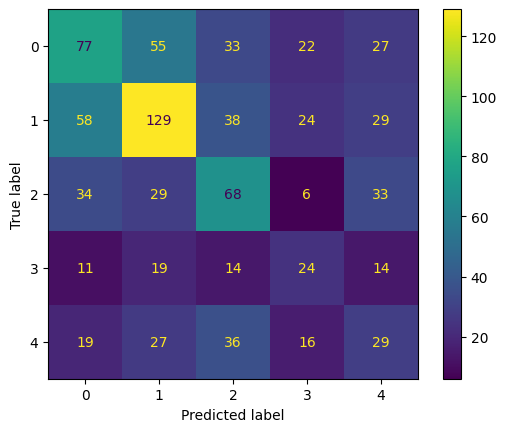

In [15]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.36      0.37       214
           1       0.50      0.46      0.48       278
           2       0.36      0.40      0.38       170
           3       0.26      0.29      0.28        82
           4       0.22      0.23      0.22       127

    accuracy                           0.38       871
   macro avg       0.35      0.35      0.35       871
weighted avg       0.38      0.38      0.38       871



# Applying random forest classification model to it

In [17]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters if needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

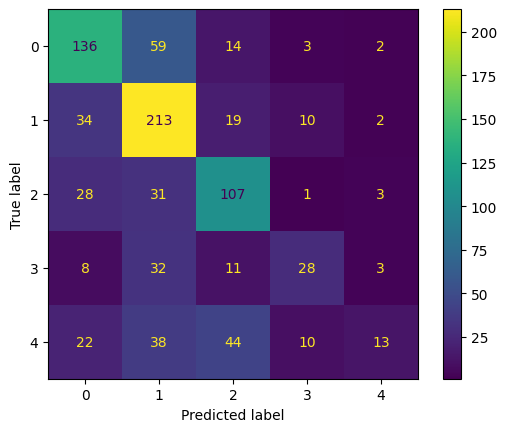

In [18]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       214
           1       0.57      0.77      0.65       278
           2       0.55      0.63      0.59       170
           3       0.54      0.34      0.42        82
           4       0.57      0.10      0.17       127

    accuracy                           0.57       871
   macro avg       0.56      0.49      0.49       871
weighted avg       0.57      0.57      0.54       871

